<a href="https://colab.research.google.com/github/darunrat/data_viz/blob/main/%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%AA%E0%B8%AD%E0%B8%9A%E0%B8%9B%E0%B8%A5%E0%B8%B2%E0%B8%A2%E0%B8%A0%E0%B8%B2%E0%B8%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ส่วนที่ 1

สร้างกราฟเพื่อแสดงข้อมูลต่อไปนี้ (ข้อละอย่างน้อย 1 กราฟ)

1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน
2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ
3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด
4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) ตามข้อมูลใน https://th.wikipedia.org/wiki/ภูมิภาคของประเทศไทย

## ข้อ 1

####ตารางจำนวนคนเดินทางในช่วงโควิด-19 ตั้งแต่วันที่ 1 มกราคม 2563 ถึง 26 เมษายน 2564

In [130]:
import pandas as pd

In [131]:
covid=pd.read_excel('/content/passenger-covid19 .xlsx',sheet_name='2563-2564 รวมในประเทศ',skiprows=1,header=0)
covid.dropna()

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

In [132]:
covid.index

RangeIndex(start=0, stop=38, step=1)

#####ตัดแถวที่วันที่ออก 

In [133]:
covid.drop(8, inplace=True)
covid.drop(17, inplace=True)
covid.drop(25, inplace=True)
covid.drop(30, inplace=True)

In [134]:
covid.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 18,
            19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
            37],
           dtype='int64')

In [186]:
covid.rename(columns = {list(covid)[0]:'รูปแบบการเดินทาง'}, inplace=True)

In [147]:
covid.rename(columns = {list(covid)[1]:'1 มค. 63 '}, inplace=True) #เปลียนชื่อ คอลัม จาก 2020-01-01 00:00:00 เป็น 1 มค. 63 เพื่อให้ดูง่ายขึ้น หรือจะไม่เปลี่ยนก็ได้

In [187]:
covid.dropna(inplace=True)
covid

,รูปแบบการเดินทาง,1 มค. 63,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,2845067,35

In [158]:
covid.sum() #จำนวนคนเดินทางในแต่ละวันด้วยรูปแบบการเดินทางต่างๆ ตั้งแต่วันที่ 1 มกราคม 2563 ไปจนถึงวันที่ 26 เมษายน 2564

                       ทางถนน (คน)ทางราง (คน)ทางน้ำ (คน)ทางอากาศ* (คน...
1 มค. 63                                                        15977962
2020-01-02 00:00:00                                             18939015
2020-01-03 00:00:00                                             19819379
2020-01-04 00:00:00                                             17446701
                                             ...                        
2021-04-22 00:00:00                                              9796273
2021-04-23 00:00:00                                              9836505
2021-04-24 00:00:00                                              8155197
2021-04-25 00:00:00                                              6770029
2021-04-26 00:00:00                                              9103930
Length: 483, dtype: object

In [178]:
number_covid= covid.sum()  #ต้องการหาผลรวม ตั้งแต่ 1 มกราคม 63 ถึง 31 มกราคม 63
for i in number_covid[][]:
 print(f'จำนวนคนที่เดินทางในแต่ละเดือน {number_covid[1]} คน')

SyntaxError: ignored

####ตารางจำนวนผู้ป่วยโควิด

In [9]:
covid_19=pd.read_csv('/content/covid19cases.csv')
covid_19

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57505,57506,26/4/2021,25/4/2021,ชาย,51.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57506,57507,26/4/2021,25/4/2021,ชาย,50.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57507,57508,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN
57508,57509,26/4/2021,25/4/2021,ชาย,24.0,ปี,Thailand,กรุงเทพมหานคร,อื่นๆ,NaN,NaN


In [10]:
a=covid_19['No.'].count()
print(f'จำนวนผู้ป่วยทั้งหมด = {a} คน')

จำนวนผู้ป่วยทั้งหมด = 57510 คน


In [24]:
from datetime import datetime as dt

In [21]:
covid_19['announce_date']=pd.to_datetime(covid_19['announce_date'],format='%d/%m/%Y')
covid_19['announce_date']

0       2020-01-12
1       2020-01-17
2       2020-01-22
3       2020-01-22
4       2020-01-24
           ...    
57505   2021-04-26
57506   2021-04-26
57507   2021-04-26
57508   2021-04-26
57509   2021-04-26
Name: announce_date, Length: 57510, dtype: datetime64[ns]

1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน


In [43]:
covid_j=covid_19[covid_19['announce_date']<=dt(day=31,month=1,year=2020) ]
print(f'จำนวนผู้ป่วยเดือนมากราคม 2020 = {len(covid_j)} คน')

จำนวนผู้ป่วยเดือนมากราคม 2020 = 19 คน


In [17]:
import matplotlib.pyplot as plt

TypeError: ignored

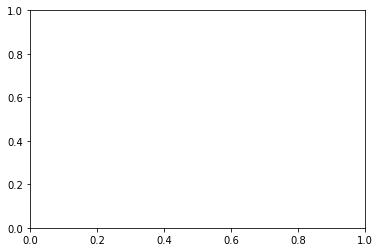

In [185]:
plt.bar(covid_j,covid )

ValueError: ignored

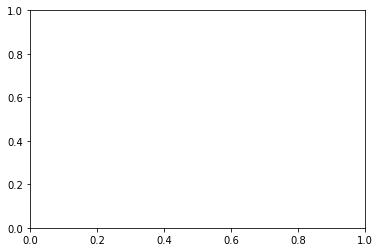

In [184]:
plt.xlabel(covid_j)

In [16]:
plt.ylabel()

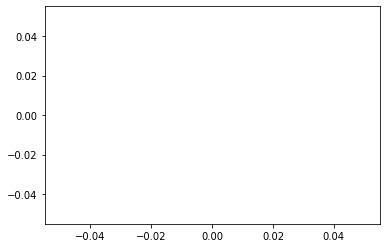

In [88]:
plt.bar((b[1],a),(b[2],a))
plt.show()

2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ

In [188]:
covid['รูปแบบการเดินทาง']=='ทางถนน (คน)'

0      True
1     False
2     False
3     False
4     False
6     False
9     False
10    False
13    False
14    False
15    False
18    False
19    False
20    False
21    False
22    False
23    False
26    False
27    False
28    False
31    False
32    False
33    False
34    False
Name: รูปแบบการเดินทาง, dtype: bool

3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด

4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) ตามข้อมูลใน https://th.wikipedia.org/wiki/ภูมิภาคของประเทศไทย

In [183]:
region = pd.read_excel('/content/region.xlsx')
region

,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,"อำนาจเจริญ, บึงกาฬ, บุรีรัมย์, ชัยภูมิ, กาฬสิน...",ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,"เชียงใหม่, เชียงราย, ลำปาง, ลำพูน, แม่ฮ่องสอน,...",เหนือ,เหนือ,เหนือ,เหนือ
2,ตาก,ตะวันตก,NaN,NaN,NaN
3,"สุโขทัย, พิษณุโลก, พิจิตร, กำแพงเพชร, เพชรบูรณ์",กลาง,NaN,NaN,NaN
4,"นครสวรรค์, อุทัยธานี",NaN,NaN,กลาง,NaN
5,"อ่างทอง, ชัยนาท, พระนครศรีอยุธยา, กรุงเทพมหานค...",NaN,กลาง,NaN,กลาง
6,นครนายก,NaN,NaN,ตะวันออก,NaN
7,"ฉะเชิงเทรา, จันทบุรี, ชลบุรี, ปราจีนบุรี, ระยอ...",ตะวันออก,NaN,NaN,ตะวันออก
8,"กาญจนบุรี, ราชบุรี",ตะวันตก,NaN,กลาง,กลาง
9,"เพชรบุรี, ประจวบคีรีขันธ์",NaN,NaN,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,NaN
